In [58]:

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [59]:
path = "/kaggle/input/giasmp/GiaSMP.csv"
data = pd.read_csv(path, encoding="latin-1",sep=";")
data
msv = 2151260829
col1 = msv%15 + 1
col2 = msv%15 + 2
data_3 = data[[str(col1),str(col2)]]
data_3.head(5)

,10,11
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.1,1010.8
4,1061.5,1061.5


In [61]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, [10, 11]]

In [62]:
#Mo ta du lieu
print("Thông tin tổng quan về dữ liệu:")
data_3.info()

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   10      365 non-null    float64
 1   11      365 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [63]:
# Xem thông tin tổng quan về dữ liệu
print("\nThống kê mô tả của dữ liệu:")
data_3.describe()



Thống kê mô tả của dữ liệu:


,10,11
count,365.000000,365.000000
mean,1040.277808,1040.311233
std,105.153179,105.147265
min,885.700000,885.700000
25%,988.400000,988.400000
50%,1022.600000,1022.600000
75%,1061.500000,1061.500000
max,1565.500000,1565.500000


In [64]:
# Thống kê mô tả của dữ liệu
print("\nKiểm tra giá trị thiếu trong dữ liệu:")
data_3.isnull().sum()


Kiểm tra giá trị thiếu trong dữ liệu:


10    0
11    0
dtype: int64

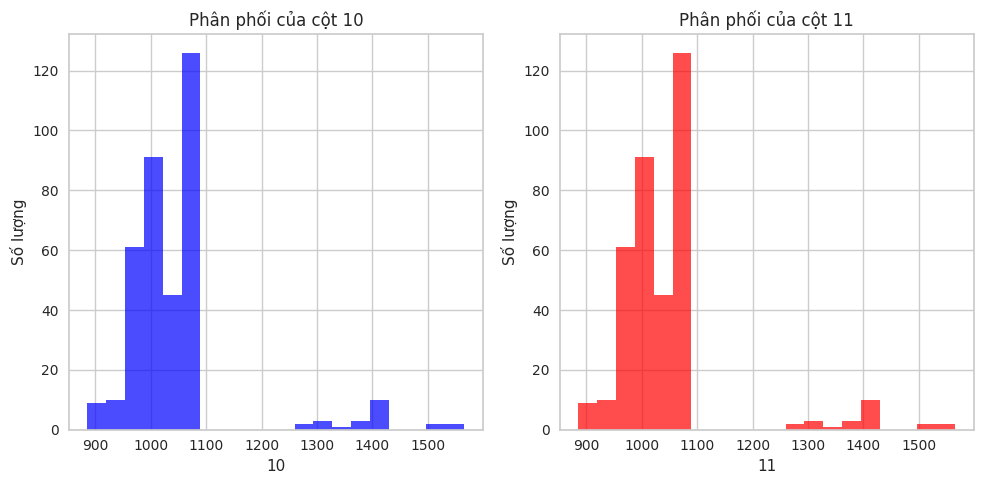

In [65]:

# Kiểm tra giá trị thiếu trong dữ liệu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data_3[str(col1)], bins=20, color='blue', alpha=0.7)
plt.title(f'Phân phối của cột {str(col1)}')
plt.xlabel(str(col1))
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
plt.hist(data_3[str(col2)], bins=20, color='red', alpha=0.7)
plt.title(f'Phân phối của cột {str(col2)}')
plt.xlabel(str(col2))
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


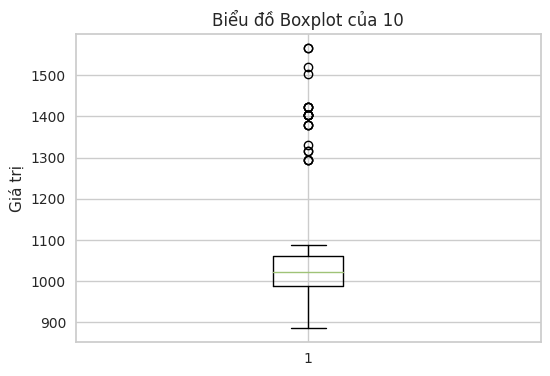

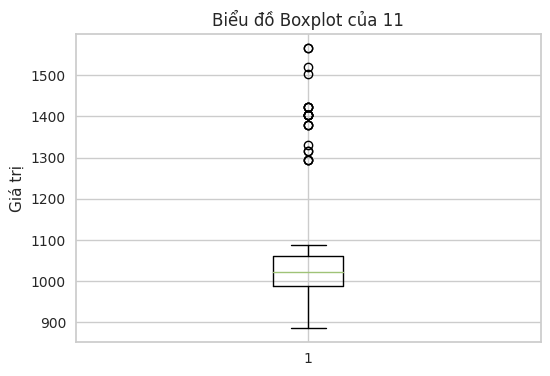

In [66]:

# Biểu đồ boxplot cho phân phối và giá trị ngoại lệ của cột col1
plt.figure(figsize=(6, 4))
plt.boxplot(data_34[str(col1)])
plt.title(f'Biểu đồ Boxplot của {col1}')
plt.ylabel('Giá trị')
plt.show()
# Biểu đồ boxplot cho phân phối và giá trị ngoại lệ của cột col2
plt.figure(figsize=(6, 4))
plt.boxplot(data_34[str(col2)])
plt.title(f'Biểu đồ Boxplot của {col2}')
plt.ylabel('Giá trị')
plt.show()


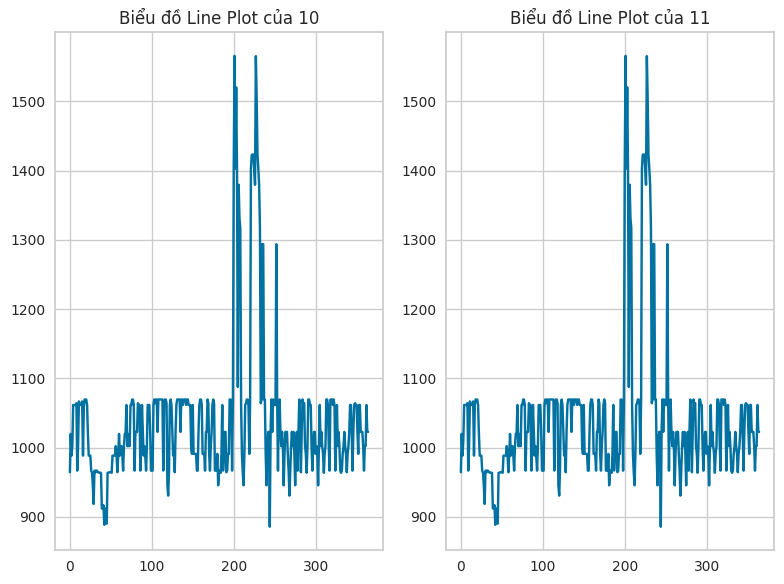

In [67]:
# Biểu đồ Line Plot cho col1 và col2
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(data_3[str(col1)])
plt.title(f'Biểu đồ Line Plot của {str(col1)}')

plt.subplot(1, 2, 2)
plt.plot(data_3[str(col2)])
plt.title(f'Biểu đồ Line Plot của {str(col2)}')

plt.tight_layout()
plt.show()


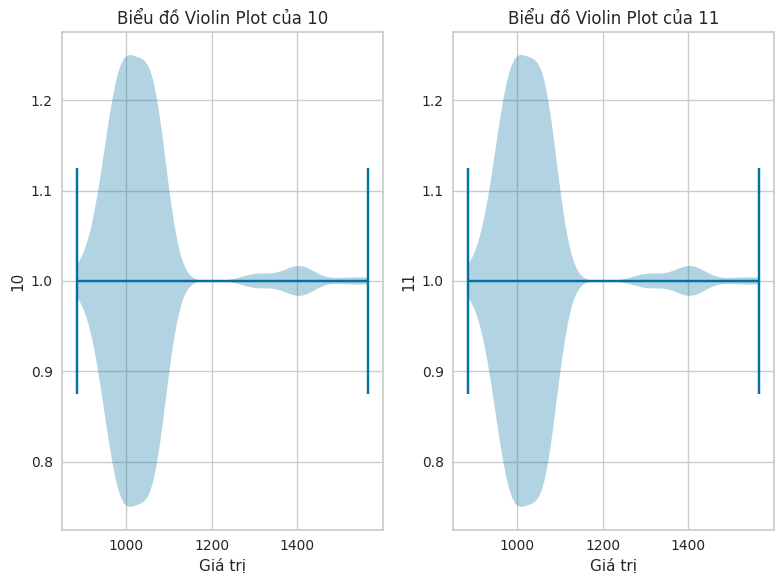

In [68]:
# Biểu đồ Violin Plot cho col1 và col2
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.violinplot(data_3[str(col1)], vert=False)
plt.title(f'Biểu đồ Violin Plot của {str(col1)}')
plt.xlabel('Giá trị')
plt.ylabel(str(col1))

plt.subplot(1, 2, 2)
plt.violinplot(data_3[str(col2)], vert=False)
plt.title(f'Biểu đồ Violin Plot của {str(col2)}')
plt.xlabel('Giá trị')
plt.ylabel(str(col2))

plt.tight_layout()
plt.show()


TÌm cụm tối ưu Kmeans


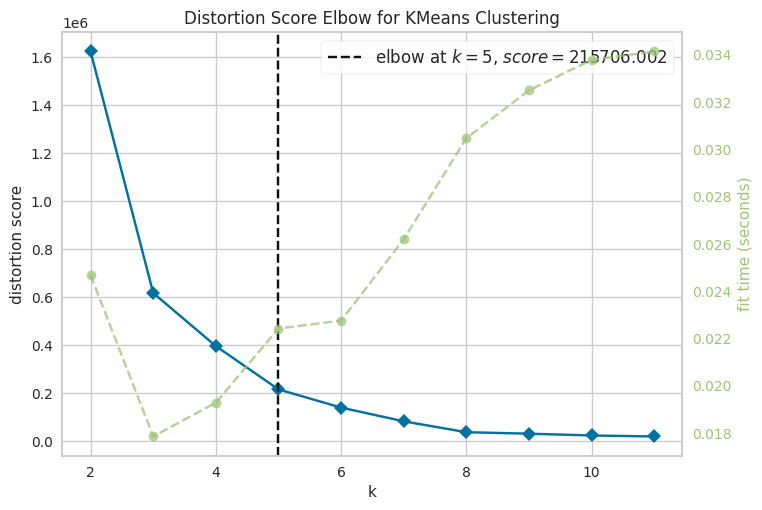

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('TÌm cụm tối ưu Kmeans')

# Assuming 'selected_data' is already a 2D array-like structure (e.g., a DataFrame or a numpy array)
# If 'selected_data' is 1D, you can convert it to 2D using selected_data = selected_data.reshape(-1, 1)
selected_data_2d = selected_data  # No reshape needed if already 2D

# Initialize the KMeans model
kmeans = KMeans(random_state=23, n_init=10)

# Initialize the KElbowVisualizer with the KMeans model and specify the range of clusters to search
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 12))

# Fit the visualizer to the data
elbow_visualizer.fit(selected_data_2d)

# Display the elbow plot
elbow_visualizer.show()


In [70]:
# Thực hiện Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


k = 5  # or another appropriate number based on your previous analysis


gmm = GaussianMixture(n_components=k, random_state=23)  # n_components can be adjusted
gmm.fit(selected_data.values)
gmm_labels = gmm.predict(selected_data.values)

print("GMM Labels:")
print(gmm_labels)

kmeans = KMeans(n_clusters=k, n_init=10, random_state=23)  # n_clusters can be adjusted
kmeans.fit(selected_data.values)
kmeans_labels = kmeans.predict(selected_data.values)

print("KMeans Labels:")
print(kmeans_labels)


GMM Labels:
[2 2 2 3 0 0 0 0 0 2 2 0 0 0 0 0 2 3 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 0 0 0 2 0 1 1 1 1 1 2 1 1 4 0 2 2 2 2 0 0 0 0 0 2 0 1
 1 1 1 1 1 1 1 1 1 1 4 0 0 4 4 0 0 2 2 2 2 2 2 2 0 2 0 0 0 0 4 0 2 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 0 0 2 2 0 0 2 2 2 2 2 2 2 0 2 2]
KMeans Labels:
[2 4 4 4 0 0 0 0 0 2 4 0 0 0 0 0 4 0 0 0 0 0 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 0 4 4 4 4
 0 0 0 0 0 2 4 4 4 0 0 0 2 4 0 4 4 4 4 2 4 0 0 0 4 2 2 2 0 0 0 0 0 4 0 0 0
 0 0 0 

In [71]:

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN


k = 5  # or another appropriate number based on your previous analysis

# Gaussian 
gmm = GaussianMixture(n_components=k, random_state=23)  # n_components can be adjusted
gmm.fit(selected_data.values)
gmm_labels = gmm.predict(selected_data.values)

# KMeans 
kmeans = KMeans(n_clusters=k, n_init=10, random_state=23)  # n_clusters can be adjusted
kmeans.fit(selected_data.values)
kmeans_labels = kmeans.predict(selected_data.values)

# DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples can be adjusted
dbscan_labels = dbscan.fit_predict(selected_data.values)

print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)


Gaussian Mixture Model labels:
[2 2 2 3 0 0 0 0 0 2 2 0 0 0 0 0 2 3 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 0 0 0 2 0 1 1 1 1 1 2 1 1 4 0 2 2 2 2 0 0 0 0 0 2 0 1
 1 1 1 1 1 1 1 1 1 1 4 0 0 4 4 0 0 2 2 2 2 2 2 2 0 2 0 0 0 0 4 0 2 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 0 0 2 2 0 0 2 2 2 2 2 2 2 0 2 2]

KMeans labels:
[2 4 4 4 0 0 0 0 0 2 4 0 0 0 0 0 4 0 0 0 0 0 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 0 4 4 4 4
 0 0 0 0 0 2 4 4 4 0 0 0 2 4 0 4 4 4 4 2 4 0 0 0 4 2 2 2 0 0 0

In [72]:
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col1},{col2} để phân tích.")
print(f"Sử dụng Gaussian Mixture Model với số components là {k}, KMeans clustering với số clusters là {k}, và DBSCAN để phân tích dữ liệu.")
import matplotlib.pyplot as plt


Kịch bản tách data:
Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.
Chọn cột số 10,11 để phân tích.
Sử dụng Gaussian Mixture Model với số components là 5, KMeans clustering với số clusters là 5, và DBSCAN để phân tích dữ liệu.


Text(0.5, 1.0, 'Gaussian Mixture Model')

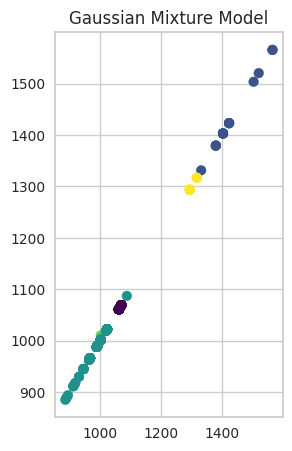

In [73]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')


Text(0.5, 1.0, 'KMeans')

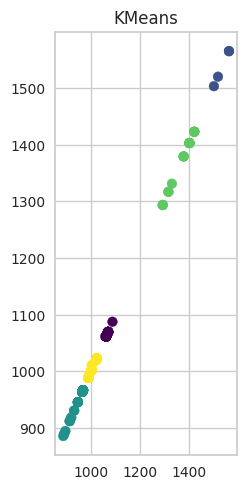

In [74]:
plt.subplot(1, 3, 2)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')

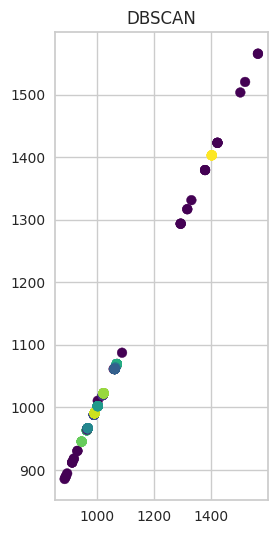

In [75]:
plt.subplot(1, 3, 3)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()